In [109]:
import keras

👆kerasをインポートします。

In [18]:
from keras.models import Model  
from keras.layers import Input, Dense, Flatten
import numpy as np

👆ニューラルネットワークの層を作るため、必要な関数を取り込んでおきます。

In [111]:
from keras.datasets import mnist  # 手書き文字認識のデータセットが入ってます。
(x_train, y_train), (x_test, y_test) = mnist.load_data()

👆画像を取り入れます。
x_train: 訓練画像, y_train: x_trainに対応する数字の答え, x_test: テスト画像, y_test: x_testに対応する数字の答え。

In [112]:
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


訓練データの情報を表示しました。60000万枚の画像があって、縦×横が (28,28) の画像です。対応する答えも60000個です。

In [113]:
import matplotlib.pyplot as plt  # 画像を描画するツール
%matplotlib inline

👆このエディタ(jupyter notebook)に表示させるためのコマンドです。

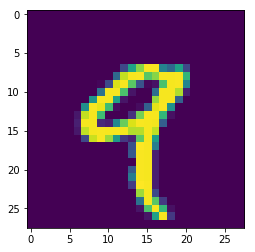

In [114]:
plt.imshow(x_train[4])  # 1枚目を表示してみる

`x_train[0] ~ x_train[59999]` にデータがあります。例えば５番目、x_train[4]は上記のような画像です。

In [115]:
y_train[4]

9

ある枚目の画像の数字の答えです。例えば先ほどの５番目、y_train[4]の答えは「9」でした。

In [116]:
x_in = Input(shape=(28, 28))
flat = Flatten()(x_in)

👆x_inに28×28の画像データを入れ（Input関数）、それを１次元の配列へ変換します（Flatten関数)。

In [117]:
hidden = Dense(200, activation='relu', name='hidden1')(flat)
hidden = Dense(50, activation='relu', name='hidden2')(hidden)
prediction = Dense(10, activation='softmax', name='prediction')(hidden)
model = Model(x_in, prediction)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

👆答えの予測方法を設定します。（ここでは２段階の係数の更新をして答えを決めることにします。）

In [118]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 28, 28)            0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
hidden1 (Dense)              (None, 200)               157000    
_________________________________________________________________
hidden2 (Dense)              (None, 50)                10050     
_________________________________________________________________
prediction (Dense)           (None, 10)                510       
Total params: 167,560
Trainable params: 167,560
Non-trainable params: 0
_________________________________________________________________


今の設定を表示しておきました。

In [119]:
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

👆0-9の答えを行列に変換しておきます。np.eye(10)は(10,10)の単位行列です。

In [120]:
np.eye(10)[5]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

例えば、答え「５」は上記のような行列になりました。

In [122]:
x_train = x_train / 255.0
x_test = x_test / 255.0

入力画像を正規化します（RGB0~255の値を持つのでMaxを１にする）

In [123]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 95us/step - loss: 1.2649 - acc: 0.6198 - val_loss: 4.2641 - val_acc: 0.7246
Epoch 2/10
60000/60000 [==============================] - 4s 75us/step - loss: 0.5228 - acc: 0.8492 - val_loss: 2.7604 - val_acc: 0.8217
Epoch 3/10
60000/60000 [==============================] - 5s 75us/step - loss: 0.3988 - acc: 0.8866 - val_loss: 2.5872 - val_acc: 0.8342
Epoch 4/10
60000/60000 [==============================] - 4s 75us/step - loss: 0.3468 - acc: 0.9012 - val_loss: 2.3029 - val_acc: 0.8517
Epoch 5/10
60000/60000 [==============================] - 5s 76us/step - loss: 0.3171 - acc: 0.9084 - val_loss: 2.0814 - val_acc: 0.8658
Epoch 6/10
60000/60000 [==============================] - 4s 75us/step - loss: 0.2965 - acc: 0.9148 - val_loss: 1.8755 - val_acc: 0.8795
Epoch 7/10
60000/60000 [==============================] - 5s 76us/step - loss: 0.2788 - acc: 0.9202 - val_loss: 1.7263 - val_acc

👆「60000個の教師データで学び、10000個のデータから128個選んでテストしてみる」という学習を100回繰り返します。毎回、正解率（Accuracy)と真値との誤差の指標（Loss)を表示しています。（「正確さ（Accuracy）」が１に近づくように、学習していきます。）

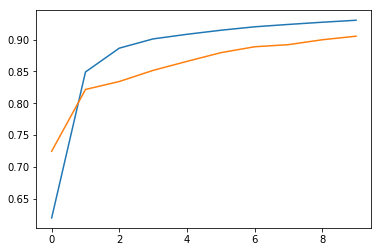

In [124]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

学習の成果を表示しました。青は教師データでの学習結果、オレンジはテストの結果です。学習するに従って正確に手書きの文字を認識できるようになっています。